<a href="https://colab.research.google.com/github/Ajendra11/Concepts-and-Technologies-of-AI/blob/main/AjendraRai_Worksheet6_l.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Task To Do – 1
Implementing Sigmoid (Logistic) Function

In [2]:
def logistic_function(x):
  return 1/(1+np.exp(-x))

Test Sigmoid Function

In [3]:
def test_logistic_function():
    x_scalar = 0
    assert round(logistic_function(x_scalar), 3) == 0.5

    x_pos = 2
    assert round(logistic_function(x_pos), 3) == round(1/(1+np.exp(-2)), 3)

    x_neg = -3
    assert round(logistic_function(x_neg), 3) == round(1/(1+np.exp(3)), 3)

    x_array = np.array([0, 2, -3])
    expected = np.array([0.5, 0.881, 0.047])
    assert np.all(np.round(logistic_function(x_array), 3) == expected)

    print("Sigmoid function tests passed!")

test_logistic_function()


Sigmoid function tests passed!


Task To Do – 2
Implementing Log-Loss Function

In [4]:
def log_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return -(y_true * np.log(y_pred)) - ((1 - y_true) * np.log(1 - y_pred))


Test Log Loss

In [5]:
def test_log_loss():
    assert np.isclose(log_loss(1, 1), 0.0)
    assert np.isclose(log_loss(0, 0), 0.0)
    assert np.isclose(log_loss(1, 0.8), -np.log(0.8))
    assert np.isclose(log_loss(0, 0.2), -np.log(0.8))

    print("Log loss tests passed!")

test_log_loss()


Log loss tests passed!


Task To Do – 3
Implementing Cost Function

In [6]:
def cost_function(y_true, y_pred):
    n = len(y_true)
    return np.sum(log_loss(y_true, y_pred)) / n


Test Case

In [7]:
y_true = np.array([1, 0, 1])
y_pred = np.array([0.9, 0.1, 0.8])

print("Cost:", cost_function(y_true, y_pred))


Cost: 0.14462152754328741


Task To Do – 4
Cost Function for Sigmoid Regression Using Parameters

In [8]:
def costfunction_logreg(X, y, w, b):
    z = np.dot(X, w) + b
    y_pred = logistic_function(z)
    return cost_function(y, y_pred)


Test Case


In [9]:
X = np.array([[10, 20], [-10, 10]])
y = np.array([1, 0])
w = np.array([0.5, 1.5])
b = 1

print("Cost:", costfunction_logreg(X, y, w, b))


Cost: 5.500008350834906


Task To Do – 5
Computing Gradients for Sigmoid Regression

In [10]:
def compute_gradient(X, y, w, b):
    n = X.shape[0]
    y_pred = logistic_function(np.dot(X, w) + b)
    error = y_pred - y

    grad_w = np.dot(X.T, error) / n
    grad_b = np.sum(error) / n

    return grad_w, grad_b


Test Case

In [11]:
grad_w, grad_b = compute_gradient(X, y, w, b)
print("grad_w:", grad_w)
print("grad_b:", grad_b)


grad_w: [-4.99991649  4.99991649]
grad_b: 0.4999916492890759


Task To Do – 6
Implementing Gradient Descent for Sigmoid Regression

In [12]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False):
    cost_history = []

    for i in range(n_iter):
        grad_w, grad_b = compute_gradient(X, y, w, b)
        w -= alpha * grad_w
        b -= alpha * grad_b

        cost = costfunction_logreg(X, y, w, b)
        cost_history.append(cost)

        if show_cost and i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return w, b, cost_history


Test Case


In [13]:
def test_gradient_descent():
    import numpy as np

    # Small synthetic dataset
    X = np.array([[0.1, 0.2],
                  [-0.1, 0.1]])   # shape (2, 2)

    y = np.array([1, 0])          # shape (2,)

    # Initial parameters
    w = np.zeros(X.shape[1])      # shape (2,)
    b = 0.0                       # scalar

    alpha = 0.1
    n_iter = 100

    # Run gradient descent
    w_out, b_out, cost_history = gradient_descent(
        X, y, w, b, alpha, n_iter, show_cost=False
    )

    # Assertions
    assert len(cost_history) == n_iter, "Cost history length incorrect"
    assert w_out.shape == w.shape, "Output weight shape mismatch"
    assert isinstance(b_out, float), "Bias is not a float"
    assert cost_history[-1] < cost_history[0], "Cost did not decrease"

    print("Test case passed successfully!")

# Run the test
test_gradient_descent()


Test case passed successfully!


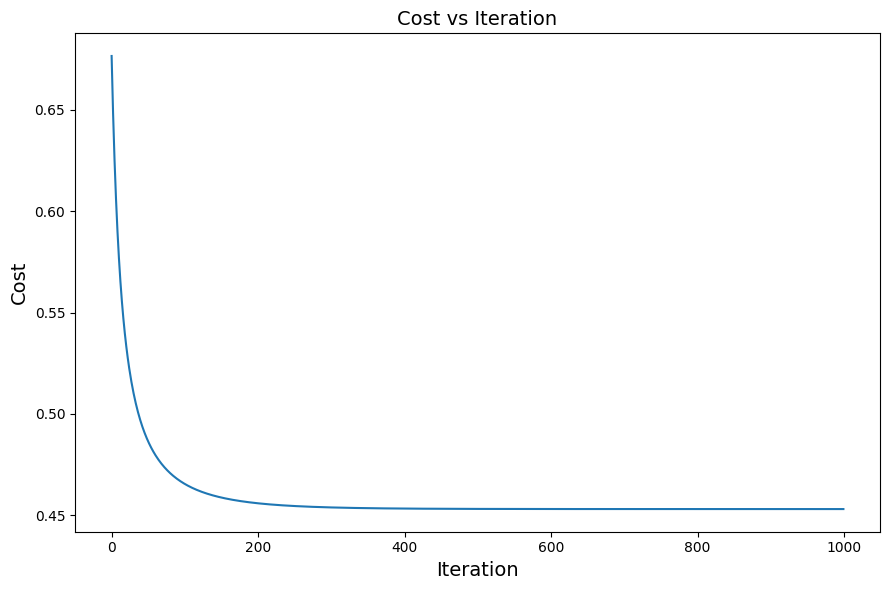

In [20]:
# Plotting cost over iteration
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

Task To Do – 7
Decision / Prediction Function

In [19]:
def prediction(X, w, b, threshold=0.5):
    probs = logistic_function(np.dot(X, w) + b)
    return (probs >= threshold).astype(int)


Test Case

In [15]:
X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]])
w_test = np.array([1.0, -1.0])
b_test = 0.0

print(prediction(X_test, w_test, b_test))


[0 1 1]


Task To Do – 8
Evaluating the Classifier

In [16]:
def evaluate_classification(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    precision = TP / (TP + FP) if (TP + FP) else 0
    recall = TP / (TP + FN) if (TP + FN) else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) else 0

    return {
        "confusion_matrix": np.array([[TN, FP], [FN, TP]]),
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }


Test Case

In [17]:
def test_evaluate_classification():
    import numpy as np

    # Ground truth and predictions
    y_true = np.array([1, 0, 1, 0, 1, 0])
    y_pred = np.array([1, 0, 0, 0, 1, 1])

    metrics = evaluate_classification(y_true, y_pred)

    # Expected values
    # TP = 2 (positions 0,4)
    # TN = 2 (positions 1,3)
    # FP = 1 (position 5)
    # FN = 1 (position 2)

    expected_confusion = np.array([[2, 1],
                                    [1, 2]])

    assert np.array_equal(metrics["confusion_matrix"], expected_confusion), \
        "Confusion matrix incorrect"

    assert np.isclose(metrics["precision"], 2 / (2 + 1)), "Precision incorrect"
    assert np.isclose(metrics["recall"], 2 / (2 + 1)), "Recall incorrect"
    assert np.isclose(metrics["f1_score"], 2 * (2/3) * (2/3) / ((2/3)+(2/3))), \
        "F1-score incorrect"

    print("Test case passed successfully!")

# Run the test
test_evaluate_classification()


Test case passed successfully!


Task To Do – 9
Applying Sigmoid Regression on PIMA Indians Diabetes Dataset

In [22]:
# Load dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data_pima_diabetes = pd.read_csv(url, names=columns)

In [ ]:
# Data Cleaning
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data_pima_diabetes[columns_to_clean] = data_pima_diabetes[columns_to_clean].replace(0, np.nan)
data_pima_diabetes.fillna(data_pima_diabetes.median(), inplace=True)
data_pima_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [23]:
data_pima_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
# Train-Test Split
X = data_pima_diabetes.drop(columns=['Outcome']).values
y = data_pima_diabetes['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standarize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Test model
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred = prediction(X_test_scaled, w, b)

#Evaluate train and test performance
train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test, w, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.4531
Test Loss (Cost): 0.5146



Test Accuracy: 70.78%

Confusion Matrix:
[[82 18]
 [27 27]]
Precision: 0.60
Recall: 0.50
F1-Score: 0.55


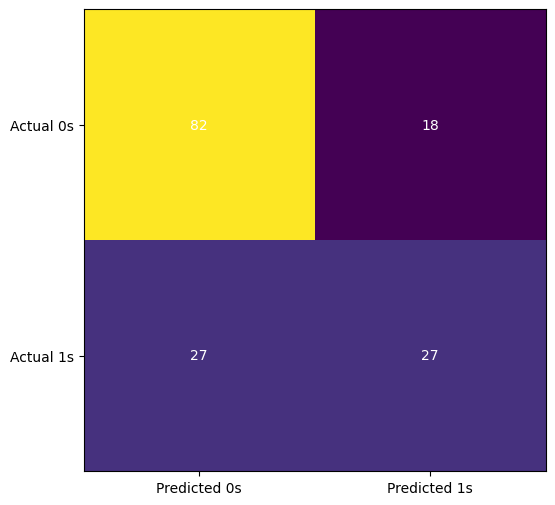

In [26]:
#Accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

#Evaluation
metrics = evaluate_classification(y_test, y_test_pred)
confusion_matrix = metrics['confusion_matrix']
precision = metrics['precision']
recall = metrics['recall']
f1_score = metrics['f1_score']
print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

#Optional - Visualizing the Confusion matrix
#Visualizing Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j, i, confusion_matrix[i, j], ha="center", va="center", color="white")
plt.show()